# Exploring the StarFlow catalog for MWM

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

from utils import fits_to_pandas, galactic_to_galactocentric
import paths

## Join MWM DR19 with StarFlow ages

In [2]:
# Get MWM data (takes a few seconds)
mwm_hdul = fits.open(paths.data / 'MWM' / 'astraAllStarASPCAP-0.6.0.fits.gz')
mwm_hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
                                                                                
        Metadata                                                                
                                                                                
PIPELINE= 'ASPCAP  '           / Pipeline name                                  
V_ASTRA = '0.6.0   '           / Astra version                                  
CREATED = '24-10-28 14:23:20'  / File creation time (UTC %y-%m-%d %H:%M:%S)     
                                                                                
        HDU Descriptions                                                        
                            

In [20]:
mwm_hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2068 / length of dimension 1                          
NAXIS2  =              1095480 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  396 / number of table fields                         
                                                                                
        Metadata                                                                
                                                                                
INSTRMNT= 'APOGEE  '           / Instrument                                     
PIPELINE= 'ASPCAP  '        

In [3]:
# Get StarFlow ages
starflow_hdul = fits.open(paths.data / 'MWM' / 'StarFlow_summary_v1_0_0.fits')
starflow_hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   91 / length of dimension 1                          
NAXIS2  =              1059521 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
EXTNAME = 'STARFLOW_TABLE'     / extension name                                 
TTYPE1  = 'sdss_id '           / Unique SDSS-V ID                               
TFORM1  = 'K       '                                                            
TTYPE2  = 'sdss4_apogee_id'    / 2MASS ID                                       
TFORM2  = '19A     '        

In [4]:
# Import MWM data (takes a while)
mwm = fits_to_pandas(paths.data / 'MWM' / 'astraAllStarASPCAP-0.6.0.fits.gz', hdu=2)
mwm

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,raw_si_h,raw_e_si_h,raw_s_h,raw_e_s_h,raw_ti_h,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h
0,85995134,19140272-1554055,4184200643491196928,4184200643505162112,7167051,125082,gaia_dr3_source,31,63050395561720686,5073182676,...,0.018572,0.003024,-0.084132,0.002980,0.078260,0.003073,NaN,NaN,-0.783540,0.001510
1,85993595,19155129-1617591,4184125807991900928,4184125807991900928,130289670,125595,gaia_dr3_source,31,63050395561662195,5073154844,...,0.059691,0.005654,0.079489,0.005673,0.104910,0.005698,NaN,NaN,-0.831350,0.002483
2,83888336,19170343-1703138,4087762027643173248,4087762031955829120,391063280,127131,gaia_dr3_source,31,63050395374745099,5070549038,...,0.086418,0.007297,-0.019033,0.007198,0.075462,0.007284,NaN,NaN,-0.018914,0.003040
3,85993872,19171130-1603082,4184137077986034048,4184137077986034048,391138912,125595,gaia_dr3_source,31,63050395561671356,5073418501,...,-0.070683,0.020903,0.231997,0.021472,0.133338,0.021273,NaN,NaN,-1.163100,0.008814
4,85990324,19180978-1616222,4183930438518525184,4183930438518525184,130700676,126107,gaia_dr3_source,31,63050395561533253,5073422656,...,0.153960,0.006191,0.148035,0.006184,0.146222,0.006182,NaN,NaN,-0.542530,0.002754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095475,69185616,NaN,2291491805490861056,2291491805490861056,237226881,2220,tic_v8,25,27021597845384016,4286064566,...,-0.383291,0.001458,-0.333470,0.001471,-0.473603,0.001434,NaN,NaN,-1.237000,0.000660
1095476,86425128,NaN,4218839894034321280,4218839894034321280,244098458,107697,tic_v8,25,27021598723976601,5167362980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095477,86679734,NaN,4243648106171993600,4243648106171993600,256490233,94894,tic_v8,25,27021599488157093,5310658412,...,0.090700,0.027178,0.538840,0.024441,-0.640360,0.036485,NaN,NaN,0.999790,0.007931
1095478,62976634,2M21281456+0645030,1739061738807205760,1739061738807205760,305040006,86730,gaia_dr3_source,31,63050394856548928,4377212753,...,0.111889,0.005085,-0.003702,0.004981,0.158950,0.005124,NaN,NaN,-0.480260,0.002292


In [23]:
# Calculate galactocentric coordinates based on galactic l, b and Gaia dist
galr, galphi, galz = galactic_to_galactocentric(
    mwm['l'], mwm['b'], mwm['r_med_photogeo']/1000
)
mwm['galr'] = galr # kpc
mwm['galphi'] = galphi # deg
mwm['galz'] = galz # kpc

In [37]:
# Calculate [O/Fe]
mwm['o_fe'] = mwm['o_h'] - mwm['fe_h']
mwm['e_o_fe'] = np.sqrt(mwm['e_o_h']**2 + mwm['e_fe_h']**2)

In [24]:
# There are some MWM stars with duplicate entries
mwm[mwm.duplicated(subset='sdss_id', keep=False)]

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,raw_e_s_h,raw_ti_h,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h,galr,galphi,galz
7,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.008312,0.155970,0.007133,NaN,NaN,-0.57477,0.003634,8.483029,175.390522,-0.038939
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.005211,-0.560280,0.005938,NaN,NaN,-0.27491,0.002149,8.483029,175.390522,-0.038939
18,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.001457,-0.402268,0.001458,NaN,NaN,-0.43870,0.000524,10.782479,158.585484,-0.375022
19,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.001496,-0.443242,0.001497,NaN,NaN,-0.31714,0.000515,10.782479,158.585484,-0.375022
21,71533149,2M00000535+1504343,2772024119641314560,2772024119641314560,456482351,72448,gaia_dr3_source,31,63050395073691265,4400239117,...,0.003420,0.054270,0.003437,NaN,NaN,-0.16288,0.001426,8.381315,174.422556,-0.851533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095439,63019370,2M21074846+0930014,1744239308997693824,1744239308997693824,283710267,82114,gaia_dr3_source,31,63050394856981422,4377072818,...,0.005860,0.172358,0.005900,NaN,NaN,-0.14325,0.002773,7.176307,163.006761,-1.104620
1095465,87696691,2M19312190+0807299,4296082514367895552,4296082514367895552,26941378,84128,gaia_dr3_source,31,63050395663617644,5249918073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.211058,172.284883,-0.103551
1095467,71076062,2M21272844-0037263,2687604132256163968,2687604132256163968,250267163,99529,gaia_dr3_source,31,63050395070716645,4367805156,...,0.002786,-0.167275,0.002863,NaN,NaN,0.24820,0.000824,8.008939,178.927076,-0.108853
1095468,68966080,2M19595305+6952448,2250945115193516672,2250945115193516672,258462116,6123,gaia_dr3_source,31,63050395058554399,4283605513,...,0.003310,-0.320580,0.002602,NaN,NaN,-0.43346,0.001469,8.158900,178.873947,0.079884


In [25]:
# Import StarFlow data
starflow = fits_to_pandas(paths.data / 'MWM' / 'StarFlow_summary_v1_0_0.fits')

In [26]:
# There are also some StarFlow stars with duplicate entries
starflow[starflow.duplicated(subset='sdss_id', keep=False)]

,sdss_id,sdss4_apogee_id,age,e_p_age,e_n_age,mass,e_p_mass,e_n_mass,training_density,BITMASK
18,115030499,2M03521707+2159487,5.885886,7.651652,4.120120,0.090775,0.140749,0.034293,3.498199e+10,3
19,115030499,2M03521707+2159487,6.222222,8.044044,4.414414,0.075686,0.125374,0.019570,3.584928e+10,2
24,91728077,2M03522052-7013280,5.969970,8.114114,3.657658,0.064578,0.125374,-0.006135,1.551985e+10,2
25,91728077,2M03522052-7013280,6.096096,8.226226,3.867868,0.057774,0.117477,-0.014153,1.555576e+10,2
39,115043882,2M03522254+2443417,14.000000,13.985986,13.355355,0.090775,0.215183,-0.103708,2.991221e+01,0
...,...,...,...,...,...,...,...,...,...,...
1059507,116012082,2M03484436+3206590,4.292585,6.172345,2.384770,0.055483,0.142633,-0.056626,8.298608e+09,2
1059508,116012082,2M03484436+3206590,5.358717,7.350701,3.366733,0.036699,0.121443,-0.071760,1.126629e+10,2
1059510,116013775,2M03484452+3253080,4.236473,6.340681,1.963928,-0.022322,0.159232,-0.363647,4.829825e+08,2
1059511,116013775,2M03484452+3253080,3.591182,5.639279,1.346693,-0.019582,0.159232,-0.357656,4.534052e+08,2


In [27]:
# Get sdss_ids
apogee_sdss_id = mwm['sdss_id']
starflow_sdss_id = starflow['sdss_id']

# Check if they are in the other catalog
apogee_in_starflow = np.isin(apogee_sdss_id, starflow_sdss_id)
starflow_in_apogee = np.isin(starflow_sdss_id, apogee_sdss_id)

print(f'There are {np.sum(apogee_in_starflow)} MWM APOGEE targets in StarFlow')
print(f'There are {np.sum(starflow_in_apogee)} StarFlow stars in MWM-APOGEE')

There are 1066926 MWM APOGEE targets in StarFlow
There are 1057075 StarFlow stars in MWM-APOGEE


In [39]:
# Merge dataframes on sdss_id
mwm_starflow = mwm.join(starflow.set_index('sdss_id'), on='sdss_id', how='inner', rsuffix='_starflow')
mwm_starflow

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
0,85995134,19140272-1554055,4184200643491196928,4184200643505162112,7167051,125082,gaia_dr3_source,31,63050395561720686,5073182676,...,0.016844,19140272-1554055,5.815816,7.497497,4.134134,0.113474,0.166411,0.053179,2.891514e+10,2
1,85993595,19155129-1617591,4184125807991900928,4184125807991900928,130289670,125595,gaia_dr3_source,31,63050395561662195,5073154844,...,0.019245,19155129-1617591,2.228228,3.825826,0.448448,0.129269,0.180421,0.073487,2.421080e+10,2
2,83888336,19170343-1703138,4087762027643173248,4087762031955829120,391063280,127131,gaia_dr3_source,31,63050395374745099,5070549038,...,0.020746,19170343-1703138,2.060060,3.517518,0.490490,0.153769,0.205532,0.094991,2.768037e+10,2
3,85993872,19171130-1603082,4184137077986034048,4184137077986034048,391138912,125595,gaia_dr3_source,31,63050395561671356,5073418501,...,0.034204,19171130-1603082,1.289289,2.158158,0.420420,0.323089,0.393918,0.238413,5.796158e+09,2
4,85990324,19180978-1616222,4183930438518525184,4183930438518525184,130700676,126107,gaia_dr3_source,31,63050395561533253,5073422656,...,0.019697,19180978-1616222,2.256256,3.601602,0.896897,0.192320,0.248843,0.127326,2.798962e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095476,86425128,NaN,4218839894034321280,4218839894034321280,244098458,107697,tic_v8,25,27021598723976601,5167362980,...,NaN,NaN,13.494990,13.971944,11.923848,-1.442828,-0.312494,-2.220979,1.584682e+06,0
1095477,86679734,NaN,4243648106171993600,4243648106171993600,256490233,94894,tic_v8,25,27021599488157093,5310658412,...,0.043707,NaN,14.000000,13.971944,13.803607,0.477121,0.476250,0.396021,4.723790e+02,0
1095478,62976634,2M21281456+0645030,1739061738807205760,1739061738807205760,305040006,86730,gaia_dr3_source,31,63050394856548928,4377212753,...,0.018666,2M21281456+0645030,7.322645,9.090180,5.555110,0.117477,0.173472,0.053179,6.450979e+09,2
1095478,62976634,2M21281456+0645030,1739061738807205760,1739061738807205760,305040006,86730,gaia_dr3_source,31,63050394856548928,4377212753,...,0.018666,2M21281456+0645030,6.873747,8.725451,4.993988,0.103303,0.157419,0.041472,9.677363e+09,2


There are about 500,000 duplicate entries in the resulting DataFrame (around 100,000 unique stars) 

In [40]:
duplicates = mwm_starflow[mwm_starflow.duplicated(subset='sdss_id', keep=False)]
duplicates

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
7,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.021076,2M00000032+5737103,14.000000,13.985986,13.691692,0.064578,0.125374,-0.006135,1.370802e+01,0
7,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.021076,2M00000032+5737103,14.000000,13.985986,13.789790,0.111459,0.171718,0.041472,3.484089e-01,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.000000,13.985986,13.691692,0.064578,0.125374,-0.006135,1.370802e+01,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.000000,13.985986,13.789790,0.111459,0.171718,0.041472,3.484089e-01,0
18,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.015377,2M00000506+5656353,4.232232,6.040040,2.438438,0.094991,0.159232,0.019570,1.405035e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095468,68966080,2M19595305+6952448,2250945115193516672,2250945115193516672,258462116,6123,gaia_dr3_source,31,63050395058554399,4283605513,...,0.016565,2M19595305+6952448,14.000000,13.971944,13.943888,-0.117176,-0.022322,-0.243256,3.496800e-40,0
1095468,68966080,2M19595305+6952448,2250945115193516672,2250945115193516672,258462116,6123,gaia_dr3_source,31,63050395058554399,4283605513,...,0.016565,2M19595305+6952448,14.000000,13.971944,13.943888,-0.103708,-0.006135,-0.234208,9.044831e-39,0
1095468,68966080,2M19595305+6952448,2250945115193516672,2250945115193516672,258462116,6123,gaia_dr3_source,31,63050395058554399,4283605513,...,0.016565,2M19595305+6952448,13.971944,13.971944,13.915832,-0.134619,-0.036288,-0.266737,6.000000e-45,0
1095478,62976634,2M21281456+0645030,1739061738807205760,1739061738807205760,305040006,86730,gaia_dr3_source,31,63050394856548928,4377212753,...,0.018666,2M21281456+0645030,7.322645,9.090180,5.555110,0.117477,0.173472,0.053179,6.450979e+09,2


In [41]:
duplicates.sdss_id.unique().shape

(95593,)

In [42]:
mwm_starflow[mwm_starflow['sdss_id'] == 54393951]

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
7,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.021076,2M00000032+5737103,14.0,13.985986,13.691692,0.064578,0.125374,-0.006135,13.708018,0
7,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.021076,2M00000032+5737103,14.0,13.985986,13.789790,0.111459,0.171718,0.041472,0.348409,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.0,13.985986,13.691692,0.064578,0.125374,-0.006135,13.708018,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.0,13.985986,13.789790,0.111459,0.171718,0.041472,0.348409,0


Temporary solution: drop all duplicates after the first entry

In [43]:
mwm_starflow.drop_duplicates(subset='sdss_id', keep='first', inplace=True)
mwm_starflow

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
0,85995134,19140272-1554055,4184200643491196928,4184200643505162112,7167051,125082,gaia_dr3_source,31,63050395561720686,5073182676,...,0.016844,19140272-1554055,5.815816,7.497497,4.134134,0.113474,0.166411,0.053179,2.891514e+10,2
1,85993595,19155129-1617591,4184125807991900928,4184125807991900928,130289670,125595,gaia_dr3_source,31,63050395561662195,5073154844,...,0.019245,19155129-1617591,2.228228,3.825826,0.448448,0.129269,0.180421,0.073487,2.421080e+10,2
2,83888336,19170343-1703138,4087762027643173248,4087762031955829120,391063280,127131,gaia_dr3_source,31,63050395374745099,5070549038,...,0.020746,19170343-1703138,2.060060,3.517518,0.490490,0.153769,0.205532,0.094991,2.768037e+10,2
3,85993872,19171130-1603082,4184137077986034048,4184137077986034048,391138912,125595,gaia_dr3_source,31,63050395561671356,5073418501,...,0.034204,19171130-1603082,1.289289,2.158158,0.420420,0.323089,0.393918,0.238413,5.796158e+09,2
4,85990324,19180978-1616222,4183930438518525184,4183930438518525184,130700676,126107,gaia_dr3_source,31,63050395561533253,5073422656,...,0.019697,19180978-1616222,2.256256,3.601602,0.896897,0.192320,0.248843,0.127326,2.798962e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095474,66083125,NaN,2022868990189037824,2022868990189037824,112158028,57503,tic_v8,25,27021598861941328,5305580894,...,0.015778,NaN,8.725451,10.997996,6.509018,0.012017,0.187261,-0.307165,1.851610e+09,2
1095475,69185616,NaN,2291491805490861056,2291491805490861056,237226881,2220,tic_v8,25,27021597845384016,4286064566,...,0.015412,NaN,8.024048,10.268537,5.807615,0.024533,0.101240,-0.068691,7.613589e+09,2
1095476,86425128,NaN,4218839894034321280,4218839894034321280,244098458,107697,tic_v8,25,27021598723976601,5167362980,...,NaN,NaN,13.494990,13.971944,11.923848,-1.442828,-0.312494,-2.220979,1.584682e+06,0
1095477,86679734,NaN,4243648106171993600,4243648106171993600,256490233,94894,tic_v8,25,27021599488157093,5310658412,...,0.043707,NaN,14.000000,13.971944,13.803607,0.477121,0.476250,0.396021,4.723790e+02,0


In [44]:
# Use recommended training density cut of 3e9
mwm_starflow_good = mwm_starflow[mwm_starflow['training_density'] >= 3.e9]
mwm_starflow_good

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
0,85995134,19140272-1554055,4184200643491196928,4184200643505162112,7167051,125082,gaia_dr3_source,31,63050395561720686,5073182676,...,0.016844,19140272-1554055,5.815816,7.497497,4.134134,0.113474,0.166411,0.053179,2.891514e+10,2
1,85993595,19155129-1617591,4184125807991900928,4184125807991900928,130289670,125595,gaia_dr3_source,31,63050395561662195,5073154844,...,0.019245,19155129-1617591,2.228228,3.825826,0.448448,0.129269,0.180421,0.073487,2.421080e+10,2
2,83888336,19170343-1703138,4087762027643173248,4087762031955829120,391063280,127131,gaia_dr3_source,31,63050395374745099,5070549038,...,0.020746,19170343-1703138,2.060060,3.517518,0.490490,0.153769,0.205532,0.094991,2.768037e+10,2
3,85993872,19171130-1603082,4184137077986034048,4184137077986034048,391138912,125595,gaia_dr3_source,31,63050395561671356,5073418501,...,0.034204,19171130-1603082,1.289289,2.158158,0.420420,0.323089,0.393918,0.238413,5.796158e+09,2
4,85990324,19180978-1616222,4183930438518525184,4183930438518525184,130700676,126107,gaia_dr3_source,31,63050395561533253,5073422656,...,0.019697,19180978-1616222,2.256256,3.601602,0.896897,0.192320,0.248843,0.127326,2.798962e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095454,66224116,NaN,2029371020883330944,2029371020883330944,117483902,50347,tic_v8,25,27021598941252499,5385020835,...,NaN,NaN,6.985972,8.753507,5.218437,0.064578,0.115480,0.006907,2.997892e+10,2
1095455,69171559,NaN,2288584353150081280,2288584357446969856,366581971,3255,tic_v8,25,27021597844370951,4285045260,...,NaN,NaN,7.434870,9.090180,5.807615,0.109434,0.159232,0.053179,1.439505e+10,2
1095457,71164351,NaN,2699376332672747008,2699376332672747008,352898012,89804,tic_v8,25,27021599488168649,4377569194,...,0.015154,NaN,5.947896,7.911824,3.815631,0.012017,0.080051,-0.065643,5.773836e+09,2
1095466,114736186,NaN,6908378342119927168,6908378342119927168,212896820,108215,tic_v8,25,27021599489350483,5168932839,...,NaN,NaN,9.286573,11.587174,7.014028,0.006907,0.077874,-0.081100,4.472948e+09,2


## Plots!

In [45]:
local_sample = mwm_starflow_good[
    (mwm_starflow_good['galr'] >= 7.) &
    (mwm_starflow_good['galr'] < 9.) &
    (mwm_starflow_good['galz'].abs() < 2.)
]
local_sample

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
0,85995134,19140272-1554055,4184200643491196928,4184200643505162112,7167051,125082,gaia_dr3_source,31,63050395561720686,5073182676,...,0.016844,19140272-1554055,5.815816,7.497497,4.134134,0.113474,0.166411,0.053179,2.891514e+10,2
1,85993595,19155129-1617591,4184125807991900928,4184125807991900928,130289670,125595,gaia_dr3_source,31,63050395561662195,5073154844,...,0.019245,19155129-1617591,2.228228,3.825826,0.448448,0.129269,0.180421,0.073487,2.421080e+10,2
2,83888336,19170343-1703138,4087762027643173248,4087762031955829120,391063280,127131,gaia_dr3_source,31,63050395374745099,5070549038,...,0.020746,19170343-1703138,2.060060,3.517518,0.490490,0.153769,0.205532,0.094991,2.768037e+10,2
3,85993872,19171130-1603082,4184137077986034048,4184137077986034048,391138912,125595,gaia_dr3_source,31,63050395561671356,5073418501,...,0.034204,19171130-1603082,1.289289,2.158158,0.420420,0.323089,0.393918,0.238413,5.796158e+09,2
4,85990324,19180978-1616222,4183930438518525184,4183930438518525184,130700676,126107,gaia_dr3_source,31,63050395561533253,5073422656,...,0.019697,19180978-1616222,2.256256,3.601602,0.896897,0.192320,0.248843,0.127326,2.798962e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095448,68446759,NaN,2189110372255762816,2189110372255762816,429366726,17064,tic_v8,25,27021597828845828,4269468832,...,0.020732,NaN,3.731463,5.106212,2.300601,0.202267,0.273175,0.115480,1.525605e+10,2
1095450,71165927,NaN,2699600731828135680,2699600731828135680,305283027,87757,tic_v8,25,27021599488169301,4377899221,...,0.015386,NaN,4.404810,6.256513,2.412826,0.092888,0.142633,0.036699,2.009000e+10,2
1095454,66224116,NaN,2029371020883330944,2029371020883330944,117483902,50347,tic_v8,25,27021598941252499,5385020835,...,NaN,NaN,6.985972,8.753507,5.218437,0.064578,0.115480,0.006907,2.997892e+10,2
1095455,69171559,NaN,2288584353150081280,2288584357446969856,366581971,3255,tic_v8,25,27021597844370951,4285045260,...,NaN,NaN,7.434870,9.090180,5.807615,0.109434,0.159232,0.053179,1.439505e+10,2


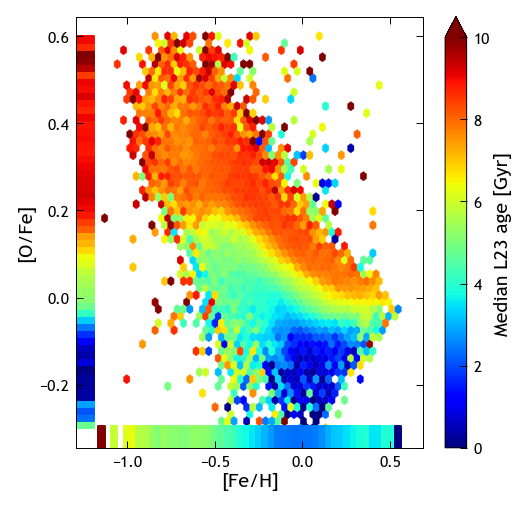

In [68]:
plt.style.use(paths.styles / 'poster.mplstyle')
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
cmap = 'jet'
# Full abundance plot
pcm0 = ax.hexbin(
    local_sample['fe_h'], local_sample['o_fe'],
    C=local_sample['age'],
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.3, 0.6],
    marginals=True, vmax=10
)
cbar = fig.colorbar(pcm0, ax=ax, orientation='vertical', extend='max')
cbar.ax.set_ylabel('Median L23 age [Gyr]')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
plt.show()

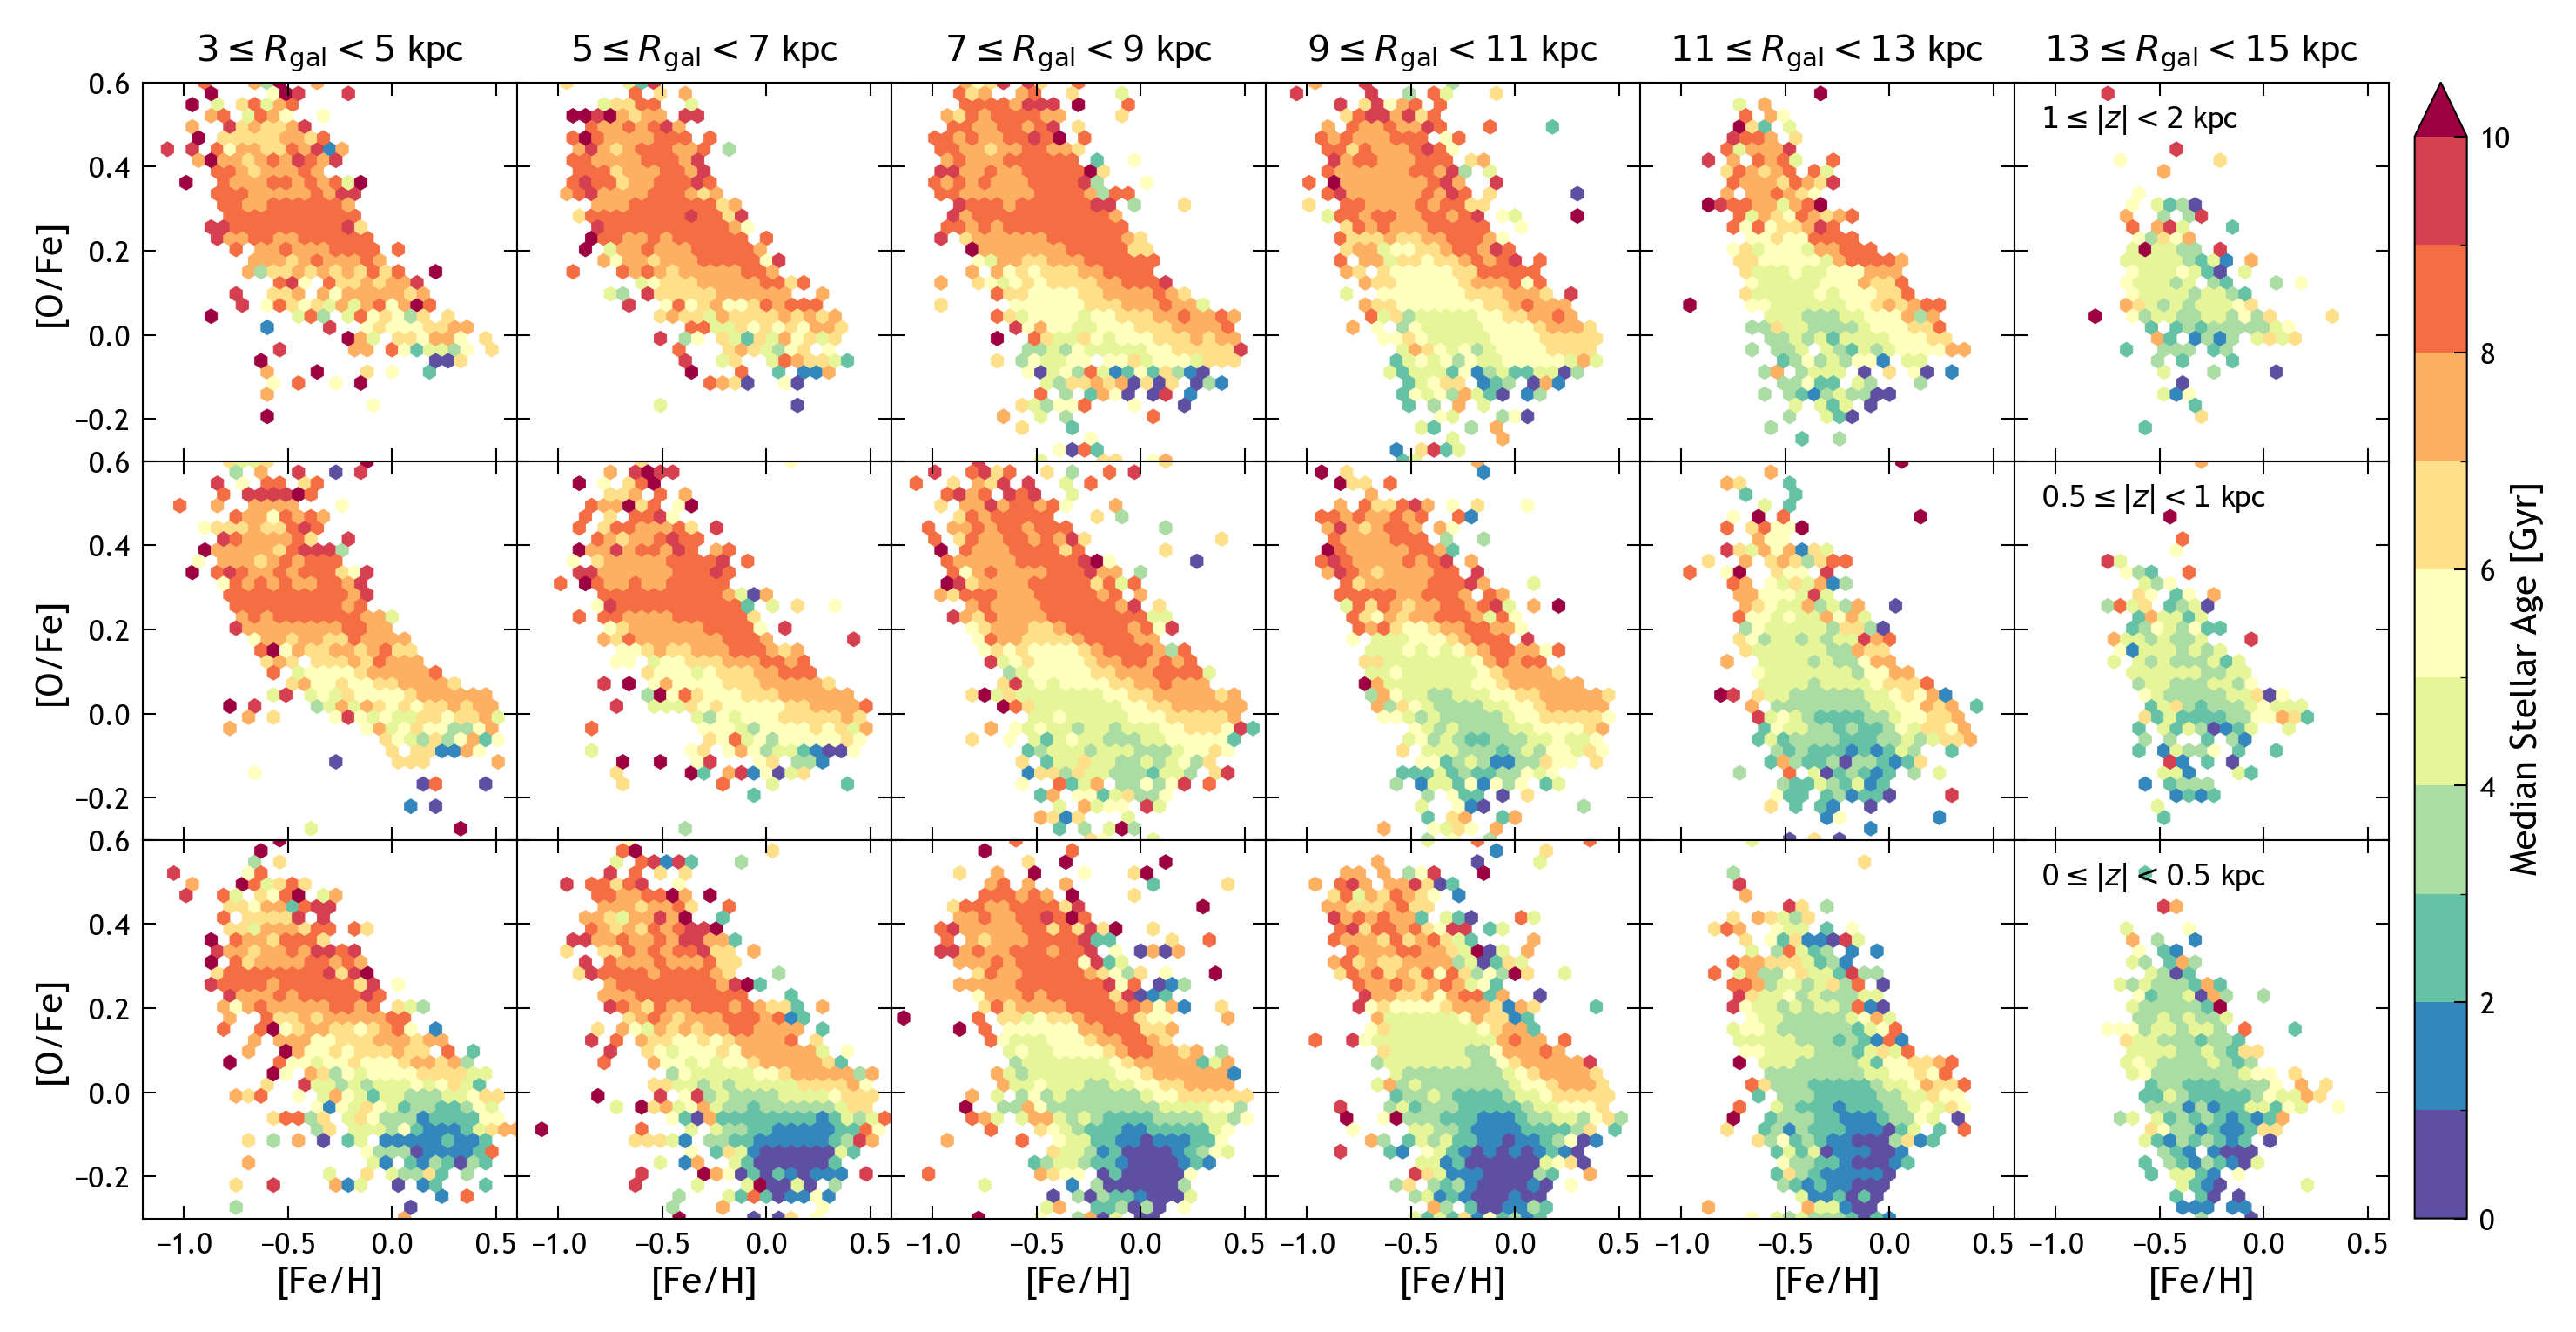

In [72]:
from scatter_plot_grid import setup_axes, setup_colorbar

galr_bins = [3, 5, 7, 9, 11, 13, 15]
absz_bins = [0, 0.5, 1, 2]
cmap = 'Spectral_r'
gridsize = 30
bounds = [-1.2, 0.6, -0.3, 0.6]
vmax = 10

fig, axs = setup_axes(
    galr_bins=galr_bins, absz_bins=absz_bins, 
    xlabel='[Fe/H]', ylabel='[O/Fe]',
    xlim = bounds[:2], ylim=bounds[2:],
    width=10, row_label_col=5
)
cbar = setup_colorbar(
    fig, cmap=cmap, vmax=vmax, label='Median Stellar Age [Gyr]', extend='max', 
    bounds=np.arange(0, 11, 1)
)
for i, row in enumerate(axs):
    absz_lim = (absz_bins[-(i+2)], absz_bins[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (galr_bins[j], galr_bins[j+1])
        subset = mwm_starflow_good[
            (mwm_starflow_good['galr'] >= galr_lim[0]) &
            (mwm_starflow_good['galr'] < galr_lim[1]) &
            (mwm_starflow_good['galz'].abs() >= absz_lim[0]) &
            (mwm_starflow_good['galz'].abs() < absz_lim[1])
        ]
        pcm = ax.hexbin(
            subset['fe_h'], subset['o_fe'],
            C=subset['age'],
            reduce_C_function=np.median,
            gridsize=gridsize, cmap=cbar.cmap, linewidths=0.2,
            extent=bounds, norm=cbar.norm
        )
fig.set_dpi(300)
plt.show()